

# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David

# Modelo preditivo do indíce Ibovespa baseado no próprio indíce.




### A pergunta que nosso modelo tenta responder é: 


# É possível prever o indíce baseado no passado? 

### O Ibovespa é o principal indicador de desempenho das ações negociadas na bolsa de valores B3, composto pelas empresas mais importantes do mercado de capitais brasileiros, é um ótimo paramêtro da economia nacional.


## Regressão Linear


 
A regressão linear é um método de ajuste de reta dos dados que estão sendo considerados, e pode ser calculado de acordo com a seguinte fórmula: $y_i=\beta_0+\beta_1x_i+\epsilon_i$. Também, ajuda na procura por padrões e anomalias desses dados.  Primeiro, para fazer uma regressão linear, é necessário achar os coeficientes $\beta_0$ e $\beta_1$.

Para achar o $\beta_0$ nós usamos a seguinte fórmula:

$$\beta_0=\bar{y}-\beta_1\bar{x}$$

E para achar o $\beta_1$ usamos a seguinte fórmula: $$\beta_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Após achar os coeficientes é necessário achar o vetor de resíduos através da fórmula: $\epsilon_i=y_i-(\beta_0+\beta_1x_i)$. Com os coeficientes e o vetor de resíduo já é possível a reta da regressão linear.
    

## Regressão linear em python

Para podermos usar a regressão linear no nosso projeto usamos as seguintes bibliotecas: sklearn.model_selection, sklearn.linear_model e sklearn.metrics. A primeira foi usada para separar os dados para teste com proporção de 20% dos dados. A segunda biblioteca foi usada para calcular a reta da regressão linear; no comando usado já foi calculado todos os coeficientes e vetor de resíduo. A terceira biblioteca foi usada para se calcular o coeficiente de determinação.  

## Sobre o nosso Modelo:


 ### Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     
     
     
     
   

## Referências:

    - Montgomery. Cap 11, pág 333.
    -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score
    -https://scikit-learn.org/stable/modules/model_evaluation.html
    -http://www.b3.com.br/pt_br/
    -https://finance.yahoo.com/

## Qual variável explicativa vai ser utilizada?

#### A variável explicativa a ser utilzada no modelo será os valores do índice ibovespa anteriores, já que o modelo preditivo é baseado no passado do índice. Ou seja, o nosso X, vai ser equivalente ao Yn-1

## Nosso modelo:

## Importando bibliotecas: 

In [132]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics


## Lendo os arquivos de dados:

In [133]:
ibov=pd.read_csv("bov.csv")

# Análise exploratória dos dados:

## Dados do Ibovespa:

In [134]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


## Vamos analisar apenas os dados de fechamento

In [135]:
ibov["Close"].head()

0    85620.0
1    85641.0
2    85525.0
3    84914.0
4    85973.0
Name: Close, dtype: float64

## Criando um novo Dataset com apenas as informações necessárias (data e fechamento) para a análise:

In [136]:
ibov=pd.DataFrame(ibov, columns=['Date','Close'])


## Dataset do Ibovespa para o modelo:

In [137]:
ibov.head()

,Date,Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


## Separando os dados:

In [138]:
date=ibov['Date']
pontos=ibov['Close']


## Gráfico do Ibovespa durante os anos de 2018 e 2019.

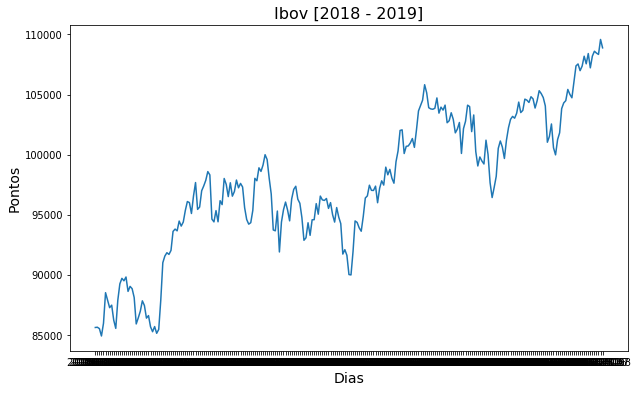

In [139]:
plt.figure(1, figsize=(10,6))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();



## Boxplot do índice Ibovespa


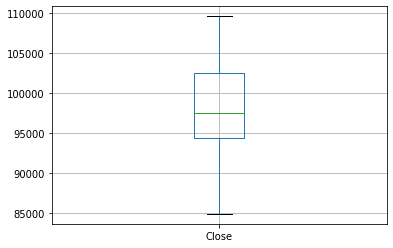

In [140]:
ibov.boxplot();


#### Nesse boxplot, é possível observar que, nesse período analisado, o indíce mantém a maioria dos seus valores entre 95.000 a 102.000 pontos, além disso, é possível observar a média do período, próximo a 97.000 pontos

## Histograma do Ibovespa

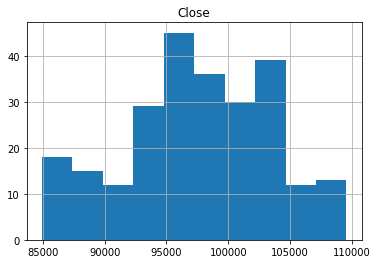

In [141]:
ibov.hist();

#### Pelo histograma, é possivel analisar que as maiorias dos dados se encontram entre 95.000 pontos a 102.000 pontos.

## Modelo: 

## Primeiro, vamos fazer um modelo baseado apenas no índice anterior:

### Criando um dataset com o Índice Ibov anterior:

In [142]:
lista = np.array(pontos)
lista=lista[1:]
ibov_anterior=pd.DataFrame(lista)




ibov_novo=ibov.join(ibov_anterior, lsuffix='_caller', rsuffix='_other')
ibovespa=ibov_novo.rename(columns={"Close": "Fechamento anterior", 0: "Fechamento"})
ibovespa=ibovespa.dropna()
ibovespa.head()


,Date,Fechamento anterior,Fechamento
0,2018-11-08,85620.0,85641.0
1,2018-11-09,85641.0,85525.0
2,2018-11-12,85525.0,84914.0
3,2018-11-13,84914.0,85973.0
4,2018-11-14,85973.0,88515.0


In [143]:
anterior=ibovespa["Fechamento anterior"]
fechamento=ibovespa["Fechamento"]

ibovespa.corr()

,Fechamento anterior,Fechamento
Fechamento anterior,1.000000,0.981372
Fechamento,0.981372,1.000000


### Separar dados para treinamento e teste

In [144]:
train, test = train_test_split(ibovespa, test_size=0.2)

### Treinamento

In [145]:
X_train = np.array(train["Fechamento anterior"]).reshape(-1, 1)
y_train = train['Fechamento']

In [146]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [147]:
print("B0=",model.intercept_)
print("B1=",model.coef_)

B0= 1136.1849765627558
B1= [0.98888357]


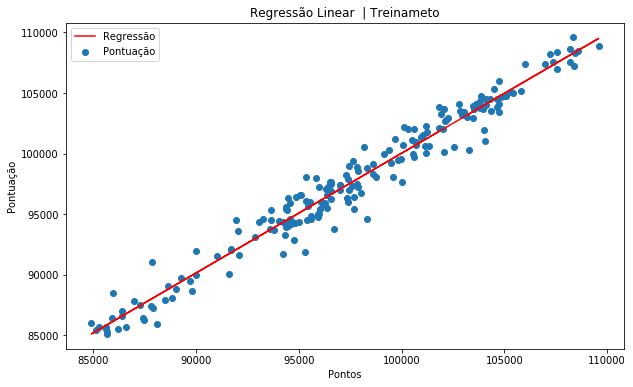

In [148]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train, y_train, label='Pontuação')
plt.plot(X_train, y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

#### Teste

In [149]:
X_test = np.array(test["Fechamento anterior"]).reshape(-1, 1)
y_test = test['Fechamento']

In [150]:
model = LinearRegression()
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

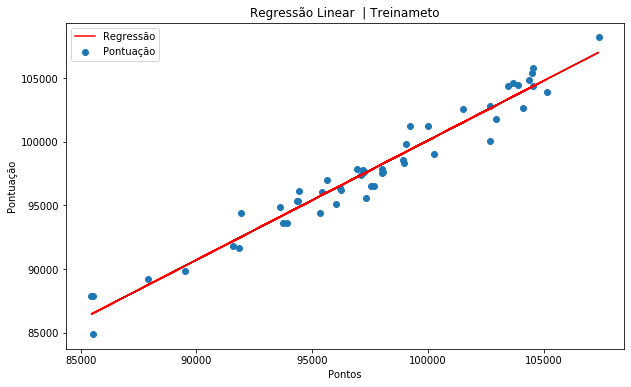

In [151]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_test, y_test, label='Pontuação')
plt.plot(X_test, y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

### R² (modelo com um anterior)

In [152]:
metrics.r2_score(y_test, y_pred)

0.9572806564644024

## Agora, vamos fazer um modelo baseado nos 4 índices anteriores:

In [153]:
vals=fechamento.values
K = 5
n = len(vals)
x_dias = []
for k in range(K):
    x = vals[k:(n-K+k)]
    x_dias.append(x)

x_dias = np.array(x_dias).transpose()

ibov_anterior1=pd.DataFrame(x_dias)
X = x_dias[:, :-1]
y = x_dias[:, -1:]

Aqui é separado os dados de teste e os dados para treinamento, os dados dados foram separados na seguinte proporção: 20% para teste e 80% para treinamento


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [155]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [156]:
print("B0=",model.intercept_)
print("B's=",model.coef_)


B0= [1921.21994236]
B's= [[-0.0807807   0.17631498 -0.08862058  0.97434091]]


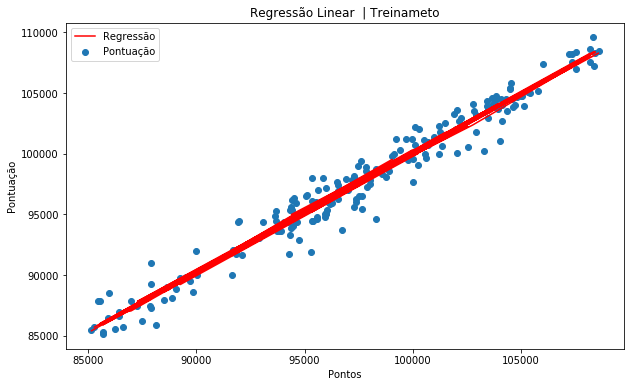

In [157]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train[:,3], y_train, label='Pontuação')
plt.plot(X_train[:,3], y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

In [164]:
y_pred = model.predict(X_test)

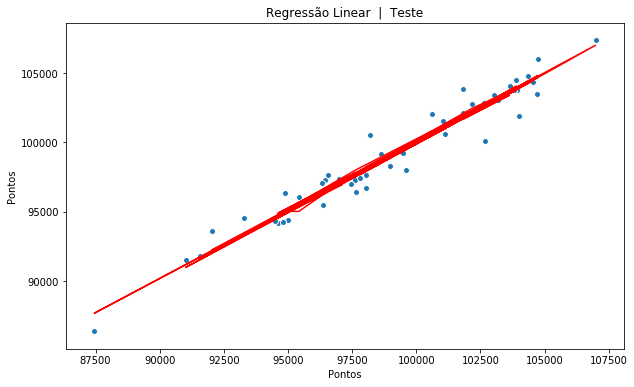

In [165]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  |  Teste')
plt.plot(X_test[:,3],y_pred , color='r', label='Regressão')
plt.scatter(X_test[:,3], y_test, edgecolor='w', label='Pontos')
plt.xlabel('Pontos')
plt.ylabel('Pontos')

plt.show()

## R² (modelo com 4 anteriores):

In [166]:
metrics.r2_score(y_test, y_pred)

0.9455796895115152

# Análise dos resíduos 

In [161]:
e=y_test-y_pred_t

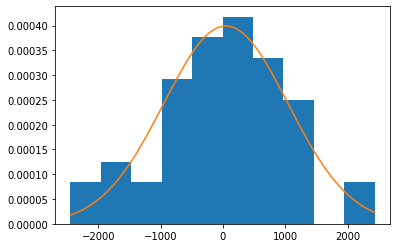

In [162]:
from scipy.stats import norm

mu, std = norm.fit(e)
        
x = np.linspace(min(e), max(e), 100)
p = norm.pdf(x, mu, std)
plt.hist(e, density=True)

plt.plot(x, p)
plt.show()




In [163]:
e.mean()

46.641408342191575